# IBM Backend Usage

This notebook should serve as a practice/example document for me for figuring out how to get Python `qiskit` code to run on the IBM backends.

In [2]:
# import requisite libraries
import qiskit as q
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we'll construct our basic circuit. Just for testing, we'll generate and measure a simple Bell state:

$$ (\vert 00 \rangle + \vert 11 \rangle) / \sqrt{2}$$

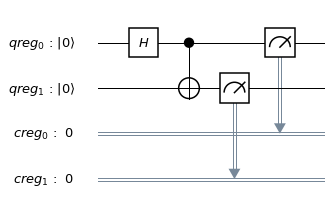

In [6]:
# initialize circuit elements
qreg = q.QuantumRegister(2, 'qreg')
creg = q.ClassicalRegister(2, 'creg')
qc = q.QuantumCircuit(qreg, creg)

# specify circuit logic
qc.h(qreg[0])
qc.cx(qreg[0], qreg[1])
qc.measure(qreg, creg)

# show circuit
qc.draw(output='mpl')

Now that we have our circuit, we will load our IBM account. This depends on having already provided our IBM QX API key, which is given on the website.

In [9]:
q.IBMQ.load_accounts()

We can see which backends are available:

In [10]:
q.IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

Or, more specifically, we can locate the least busy backend that is capable of supporting our program.

In [12]:
backends = q.IBMQ.backends(filters=lambda x:
                           x.configuration().n_qubits >= 2
                           and not
                           x.configuration().simulator)
best = q.providers.ibmq.least_busy(backends)

We can then run our program on this backend, specifying things like number of shots and maximum credits we are willing to spend.

In [16]:
job = q.execute(qc, backend=best, shots=1024, max_credits=3)

# monitor the job
q.tools.monitor.job_monitor(job)

# get the job results
# this call is blocking, so it is better to wait
# and read the status off the monitor
result = job.result()

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

Finally, we can plot the results just like we did from the simulator.

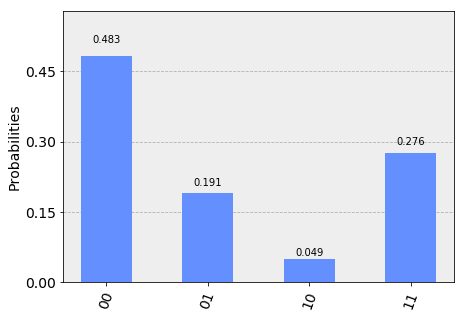

In [18]:
import qiskit.tools.visualization as viz

counts = result.get_counts(qc)
viz.plot_histogram(counts)

It can be useful to record the job ID in case we need to retrieve the results again at a future date. I am not sure if it is possible to retrieve the number of currently available credits.

In [19]:
job.job_id()

'5cb0b4b559811b005974573d'